In [1]:
from moving_profiles import y_func, y_func_prime2, f_func, f_func_prime2
from moving_profiles import k_squared_func, ksi_0_func
from moving_profiles import generate_sta_profile
from static_potential import StaticPotential
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
# planck constant, J * s
h = 6.62607015 * 1e-34

# reduced planck constant, J * s
h_reduced = h / (2 * jnp.pi)

# maximum amplitude of moving tweezer potential, J
A_mt = 3.57 * h * 1e6

# maximum amplitude of static tweezer potential, J
A_st = 0.53 * h * 1e6

# width of moving beam, m
sigma_mt = 0.47 * 1e-6

# width of static beam, m
sigma_st = 0.35 * 1e-6

# total time of movement + waiting, s
T = 2.5 * 1e-3

# part of T devoted to movement stage
eta = 2/5

# atom mass, kg
m = 6.47 * 1e-26  # Potassium-39

# radial freq of static trap, 2pi * Hz
w_st = jnp.sqrt(A_st / m) / sigma_st

# max radial freq of moving tweezer, 2pi * Hz
w_mt = jnp.sqrt(A_mt / m) / sigma_mt

# radial period of static trap, sec
t_st = 2 * jnp.pi / w_st

In [3]:
t_st

Array(2.9849296e-05, dtype=float32, weak_type=True)

In [4]:
#relative max depth of moving tweezer
a_mt = A_mt / A_st

#relative width of moving tweezer
delta_mt = sigma_mt / sigma_st

#Borne parameter
B = A_st * (sigma_st ** 2) * 2 * m / (h_reduced ** 2)

#how many periods of static trap does experiment take
t_rel = T / t_st 

a_mt, delta_mt, B, t_rel

(6.735849056603771,
 1.3428571428571427,
 500.5528539829902,
 Array(83.754074, dtype=float32, weak_type=True))

In [5]:
factor = jnp.sqrt(delta_mt / jnp.sqrt(a_mt))
factor

Array(0.7193112, dtype=float32, weak_type=True)

In [6]:
sp = StaticPotential.from_json('params.json')
sp

StaticPotential(
    x_left=0.000,
    x_right=20.000,
    borne_parameter=5.006e+02,
    c_prefactor=1.006e-02
)

In [7]:
N_t = 1000
time_grid = jnp.linspace(0 , t_rel, N_t, dtype=jnp.complex64)
time_step = (time_grid[1] - time_grid[0]).real
time_step

Array(0.08383791, dtype=float32)

In [8]:
y_values = y_func(time_grid, t_rel, sp.x_left, sp.x_right, eta)
y_prime2_values = y_func_prime2(time_grid, t_rel, sp.x_left, sp.x_right, eta)

f_values = f_func(time_grid, t_rel, factor, eta)
f_prime2_values = f_func_prime2(time_grid, t_rel, factor, eta)

k_squared_values = k_squared_func(time_grid, t_rel, factor, eta)

ksi_0_values = ksi_0_func(time_grid, t_rel, sp.x_left, sp.x_right, factor, eta)


/home/kirill/miniconda3/envs/myenv/lib/python3.12/site-packages/jax/_src/array.py:428: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._value, dtype=dtype, **kwds)


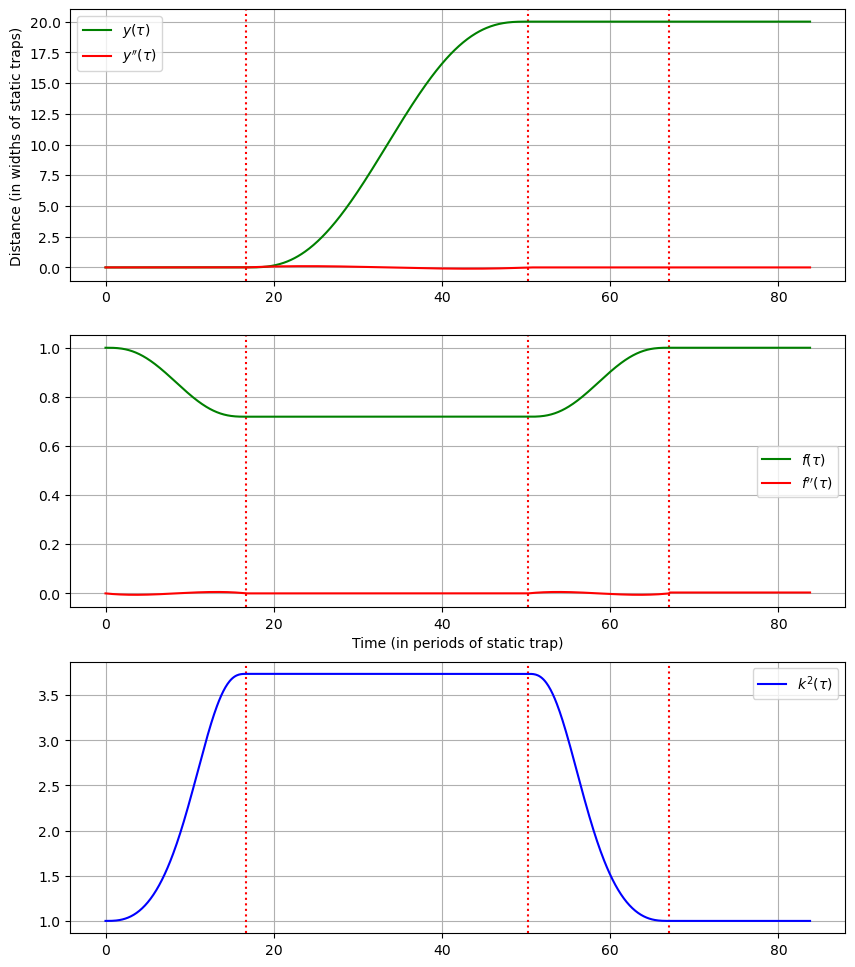

<Figure size 640x480 with 0 Axes>

In [9]:
# Define the time markers
first, second, third = (1 - eta) * t_rel, (1 + 2 * eta) * t_rel, (2 + eta) * t_rel

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for ax in axes:
    ax.axvline(first/3, ls=":", color="red")
    ax.axvline(second/3, ls=":", color="red")
    ax.axvline(third/3, ls=":", color="red")

axes[0].plot(time_grid, y_values, label=r"$y(\tau)$", color="green")
axes[0].plot(time_grid, y_prime2_values, label=r"$y''(\tau)$", color="red")
axes[0].set_ylabel("Distance (in widths of static traps)")
axes[0].legend()
axes[0].grid()

axes[1].plot(time_grid, f_values, label=r"$f(\tau)$", color="green")
axes[1].plot(time_grid, f_prime2_values, label=r"$f ''(\tau)$", color="red")
axes[1].set_xlabel("Time (in periods of static trap)")
axes[1].legend()
axes[1].grid()

axes[2].plot(time_grid, k_squared_values, label=r"$k^2(\tau)$", color="blue")
axes[2].legend()
axes[2].grid()

plt.show()

plt.tight_layout()
plt.show()

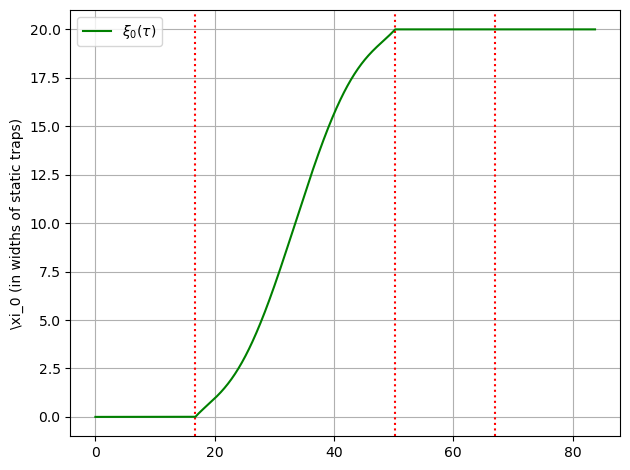

In [10]:
# Define the time markers
first, second, third = (1 - eta) * t_rel, (1 + 2 * eta) * t_rel, (2 + eta) * t_rel

fig, ax = plt.subplots()

ax.axvline(first/3, ls=":", color="red")
ax.axvline(second/3, ls=":", color="red")
ax.axvline(third/3, ls=":", color="red")

ax.plot(time_grid, ksi_0_values, label=r"$\xi_0(\tau)$", color="green")
ax.set_ylabel(r"\xi_0 (in widths of static traps)")
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

In [11]:
f, s = generate_sta_profile(
                            a_mt, time_grid,
                            t_rel,
                            sp.x_left,
                            sp.x_right,
                            eta,
                            delta_mt)

f, s = jnp.asarray(f), jnp.asarray(s)

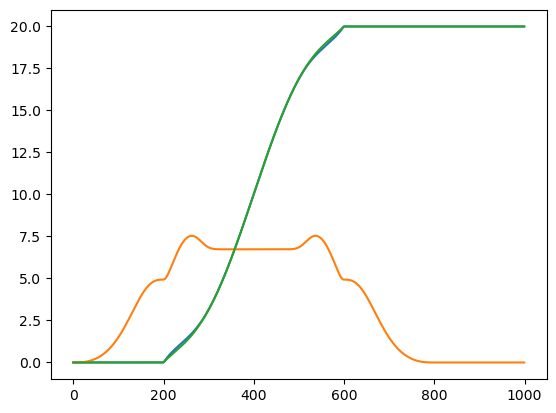

In [12]:
plt.plot(f)
plt.plot(s)
plt.plot(ksi_0_values)

In [13]:
from moving_profiles import v_st_prime, v_st_prime2, residual

In [14]:
ksi = jnp.linspace(-10,30,1000)

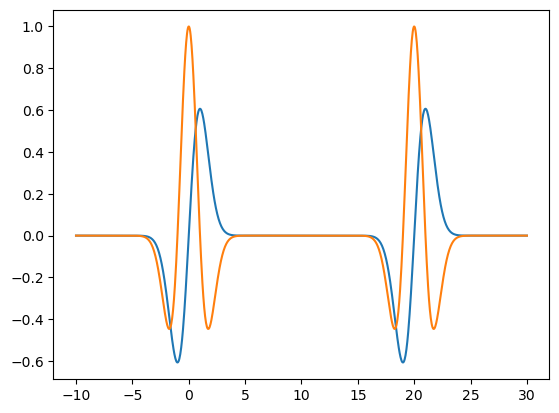

In [15]:
plt.plot(ksi,v_st_prime(ksi, 0, 20))
plt.plot(ksi,v_st_prime2(ksi, 0, 20))

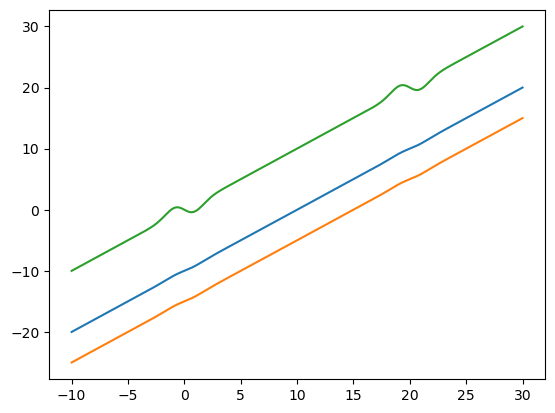

In [16]:
plt.plot(ksi, residual(ksi, 0, 20, 10, 4))
plt.plot(ksi, residual(ksi, 0, 20, 15, 4))
plt.plot(ksi, residual(ksi, 0, 20, 0, .5))